# Import

Import data, turn tags into a list of strings and define the available pitches

In [12]:
from ast import literal_eval
import pandas as pd

pitch_symbol = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

df = pd.read_csv("songs.csv")
# ignore songs that have no tags
df = df[df["tags"].notna()]

# turn tags from strings into a list of strings
df["artist_genres"] = df["artist_genres"].apply(literal_eval)
df["tags"] = df["tags"].apply(literal_eval)
df.columns

Index(['name', 'duration', 'artist_genres', 'artist_names', 'acousticness',
       'loudness', 'energy', 'danceability', 'mode', 'instrumentalness',
       ...
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97', 'B_98',
       'B_99'],
      dtype='object', length=1240)

In [13]:
df.iloc[:20, :25]

name  duration  \
0                                    Life Rolls On    219106   
1                                  I Kissed A Girl    179640   
2              Best Life (feat. Chance The Rapper)    284855   
3                                   IV. Sweatpants    180675   
4                                 Waiting For Love    228750   
5                                  Through My Skin    330468   
6                                        Sk8er Boi    204000   
7                                              Say    215653   
8   Look Over Your Shoulder (feat. Kendrick Lamar)    248810   
9                                       Bandsville    113996   
10                          As Long as You Love Me    214333   
11                  Antiphon, O quam mirabilis est    211707   
12                                     To The Ones    158993   
13                              Eu Vou Pedir à Lua    209000   
14                                         Changes    268960   
15                                         FRONTAL    261340   
16                                         Control    354066   
17                                          Rosana    234207   
18                                 Haze of the Rum    192306   
19                                 Dog & Butterfly    319533   

                                        artist_genres  \
0                        [reggae fusion, reggae rock]   
1                                    [dance pop, pop]   
2   [chicago rap, conscious hip hop, dance pop, hi...   
3                         [hip hop, atl hip hop, rap]   
4           [dance pop, pop, pop rap, edm, pop dance]   
5   [tech house, deep tech house, bulgarian electr...   
6   [dance pop, pop, post-teen pop, canadian pop, ...   
7                                                  []   
8   [conscious hip hop, west coast rap, hip pop, h...   
9   [dark trap, canadian hip hop, vapor trap, minn...   
10                              [dance pop, boy band]   
11  [classical performance, vocal ensemble, early ...   
12  [euphoric hardstyle, rawstyle, hardstyle, deep...   
13  [brega saudade, pop nacional antigas, musica p...   
14  [west coast rap, g funk, gangster rap, hip hop...   
15                     [vlaamse rap, belgian hip hop]   
16  [neo soul, r&b, urban contemporary, dance pop,...   
17                                                 []   
18                                      [guitar case]   
19  [rock, soft rock, heartland rock, new wave pop...   

                               artist_names  acousticness  loudness  energy  \
0                      ['Slightly Stoopid']      0.001630    -6.531  0.7490   
1                            ['Katy Perry']      0.002230    -3.173  0.7600   
2          ['Cardi B', 'Chance the Rapper']      0.287000    -7.438  0.6250   
3                      ['Childish Gambino']      0.154000    -9.330  0.4700   
4                                ['Avicii']      0.299000    -3.798  0.7500   
5                        ['Metodi Hristov']      0.002400    -8.690  0.5980   
6                         ['Avril Lavigne']      0.000068    -4.417  0.9000   
7                                 ['Symon']      0.360000    -3.433  0.8600   
8        ['Kendrick Lamar', 'Busta Rhymes']      0.043800    -4.345  0.8870   
9                   ['bbno$', 'Yung Gravy']      0.130000    -8.339  0.3900   
10                      ['Backstreet Boys']      0.164000    -5.534  0.8160   
11  ['Anonymous 4', 'Hildegard von Bingen']      0.991000   -27.569  0.0309   
12                    ['KIMM', 'Sub Sonik']      0.002670    -4.446  0.9660   
13                       ['Borba De Paula']      0.091200    -8.111  0.5430   
14                       ['2Pac', 'Talent']      0.040400    -6.722  0.6570   
15                             ['STIKSTOF']      0.632000    -7.986  0.5270   
16                        ['Janet Jackson']      0.071000    -5.811  0.9090   
17                                  ['Wax']      0.000952    -6.810  0.7040   
18

In [14]:
tolower = lambda s: s.lower()
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df[~df["tags"].isna()]["tags"].values.tolist())).apply(tolower)
ratios = [ratio for ratio in tags.value_counts(normalize=True).to_list()]

# Data Visualization

## Spotify Features

Here we plot the correlation matrix of the features we selected from the spotify api.

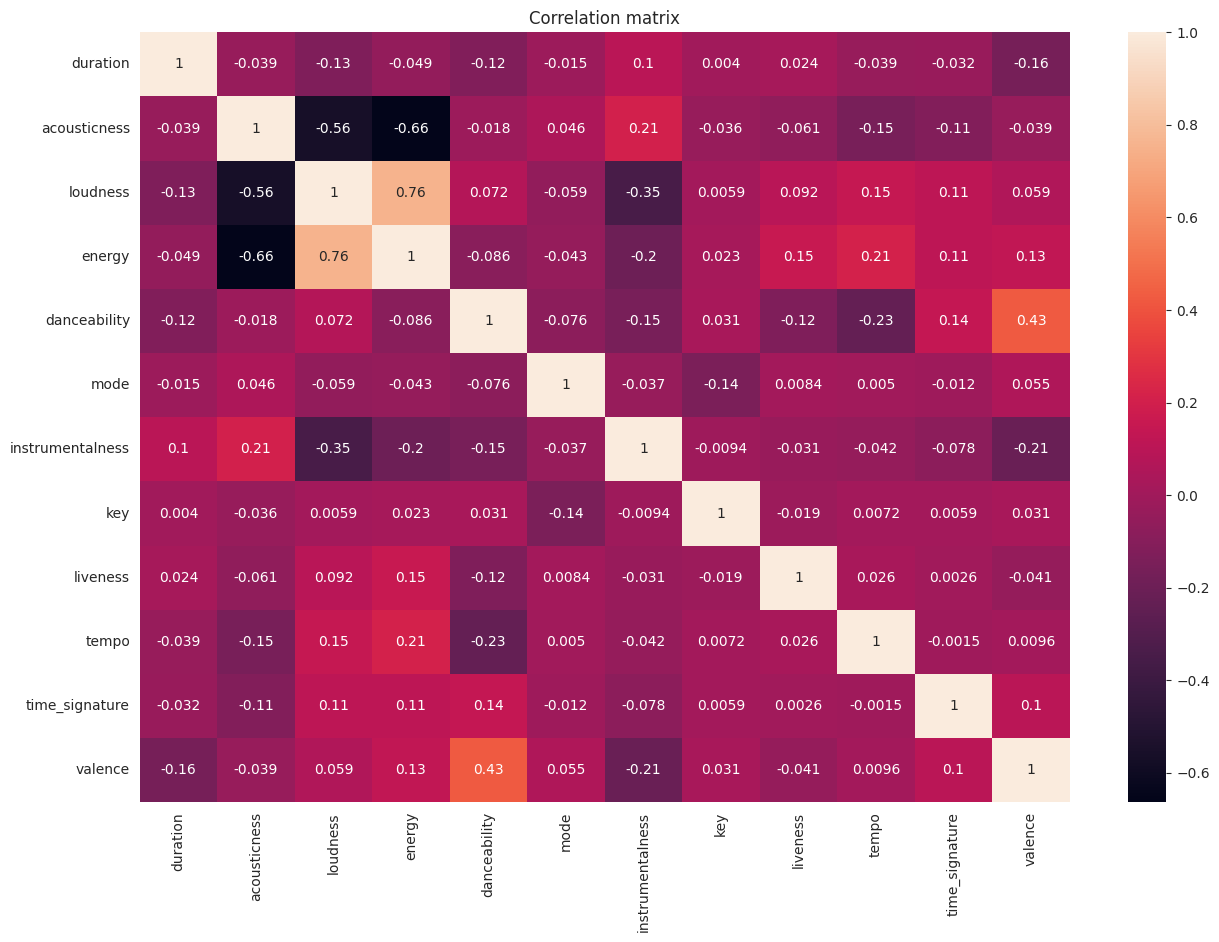

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, :16].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix")
plt.show()

We only plot the spotify features here, since we have way too many columns.
This is because we decided to use the pitches of every note as a feature. The problem is, that the amount of pitches is proportional to the length
of the song. To reduce the amount of features, we preprocessed the pitches per note down to 100 values per note. Though this still leaves us with around 1240 feature columns.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11103 entries, 0 to 11102
Columns: 1240 entries, name to B_99
dtypes: float64(1235), int64(1), object(4)
memory usage: 105.1+ MB


## Pitches

Since we have over ~100 different tags, we decided to take a closer look at the following tags, to
 get some sense fo our features, we decided to take a closer look at 5 different tags.


In [17]:
df_by_tags = {
    "indie": df[df["tags"].apply(lambda x: "indie" in x)],
    "hip-hop": df[df["tags"].apply(lambda x: "hip-hop" in x)],
    "electronic": df[df["tags"].apply(lambda x: "electronic" in x)],
    "dance": df[df["tags"].apply(lambda x: "dance" in x)],
    "classic rock": df[df["tags"].apply(lambda x: "classic rock" in x)],
    "alternative rock": df[df["tags"].apply(lambda x: "alternative rock" in x)],
    "alternative": df[df["tags"].apply(lambda x: "alternative" in x)],
    "80s": df[df["tags"].apply(lambda x: "80s" in x)],
}

dance_df = df_by_tags["dance"]

### Dance

Here we check if the correlation matrix of just the songs tagged with `dance` is different from the correlation matrix of all songs.
But as we can see, it looks pretty much the same.

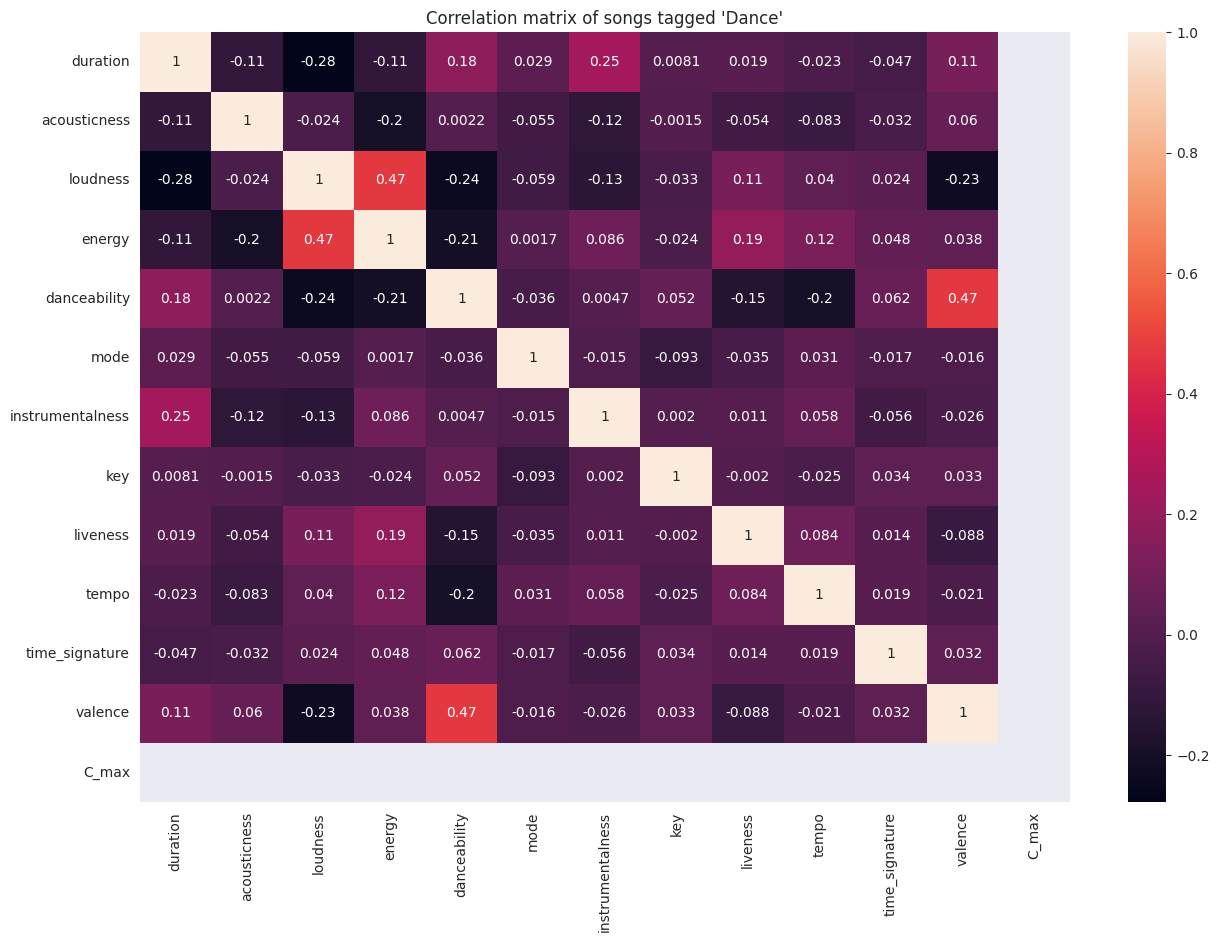

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(dance_df.iloc[:, :17].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix of songs tagged 'Dance'")
plt.show()

This plot show the avg pitches of the songs tagged with `dance`.

Text(0.5, 1.0, "Avg pitches for songs tagged with 'dance'")

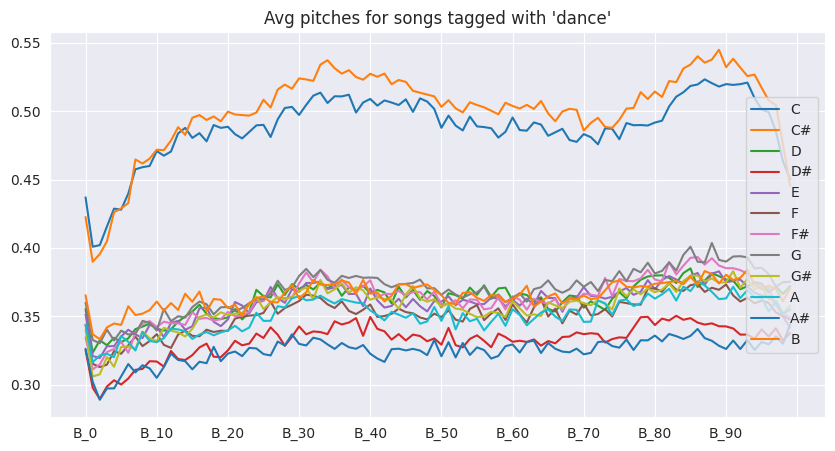

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_xticks(range(0, 101, 10))

for i, note in enumerate(pitch_symbol):
    curr_df = dance_df[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
    curr_df.plot(ax=ax)
ax.legend(pitch_symbol, loc="center right")
ax.set_title("Avg pitches for songs tagged with 'dance'")

## Plots per tag
### Pitches

In order to compare the information above with other tags, we decided to plot the pitches separately and use the tags as the legend.

And as we can see from the averages, `edm` is very different from the other tags. The `metal` tag has a very strong presents in E and B

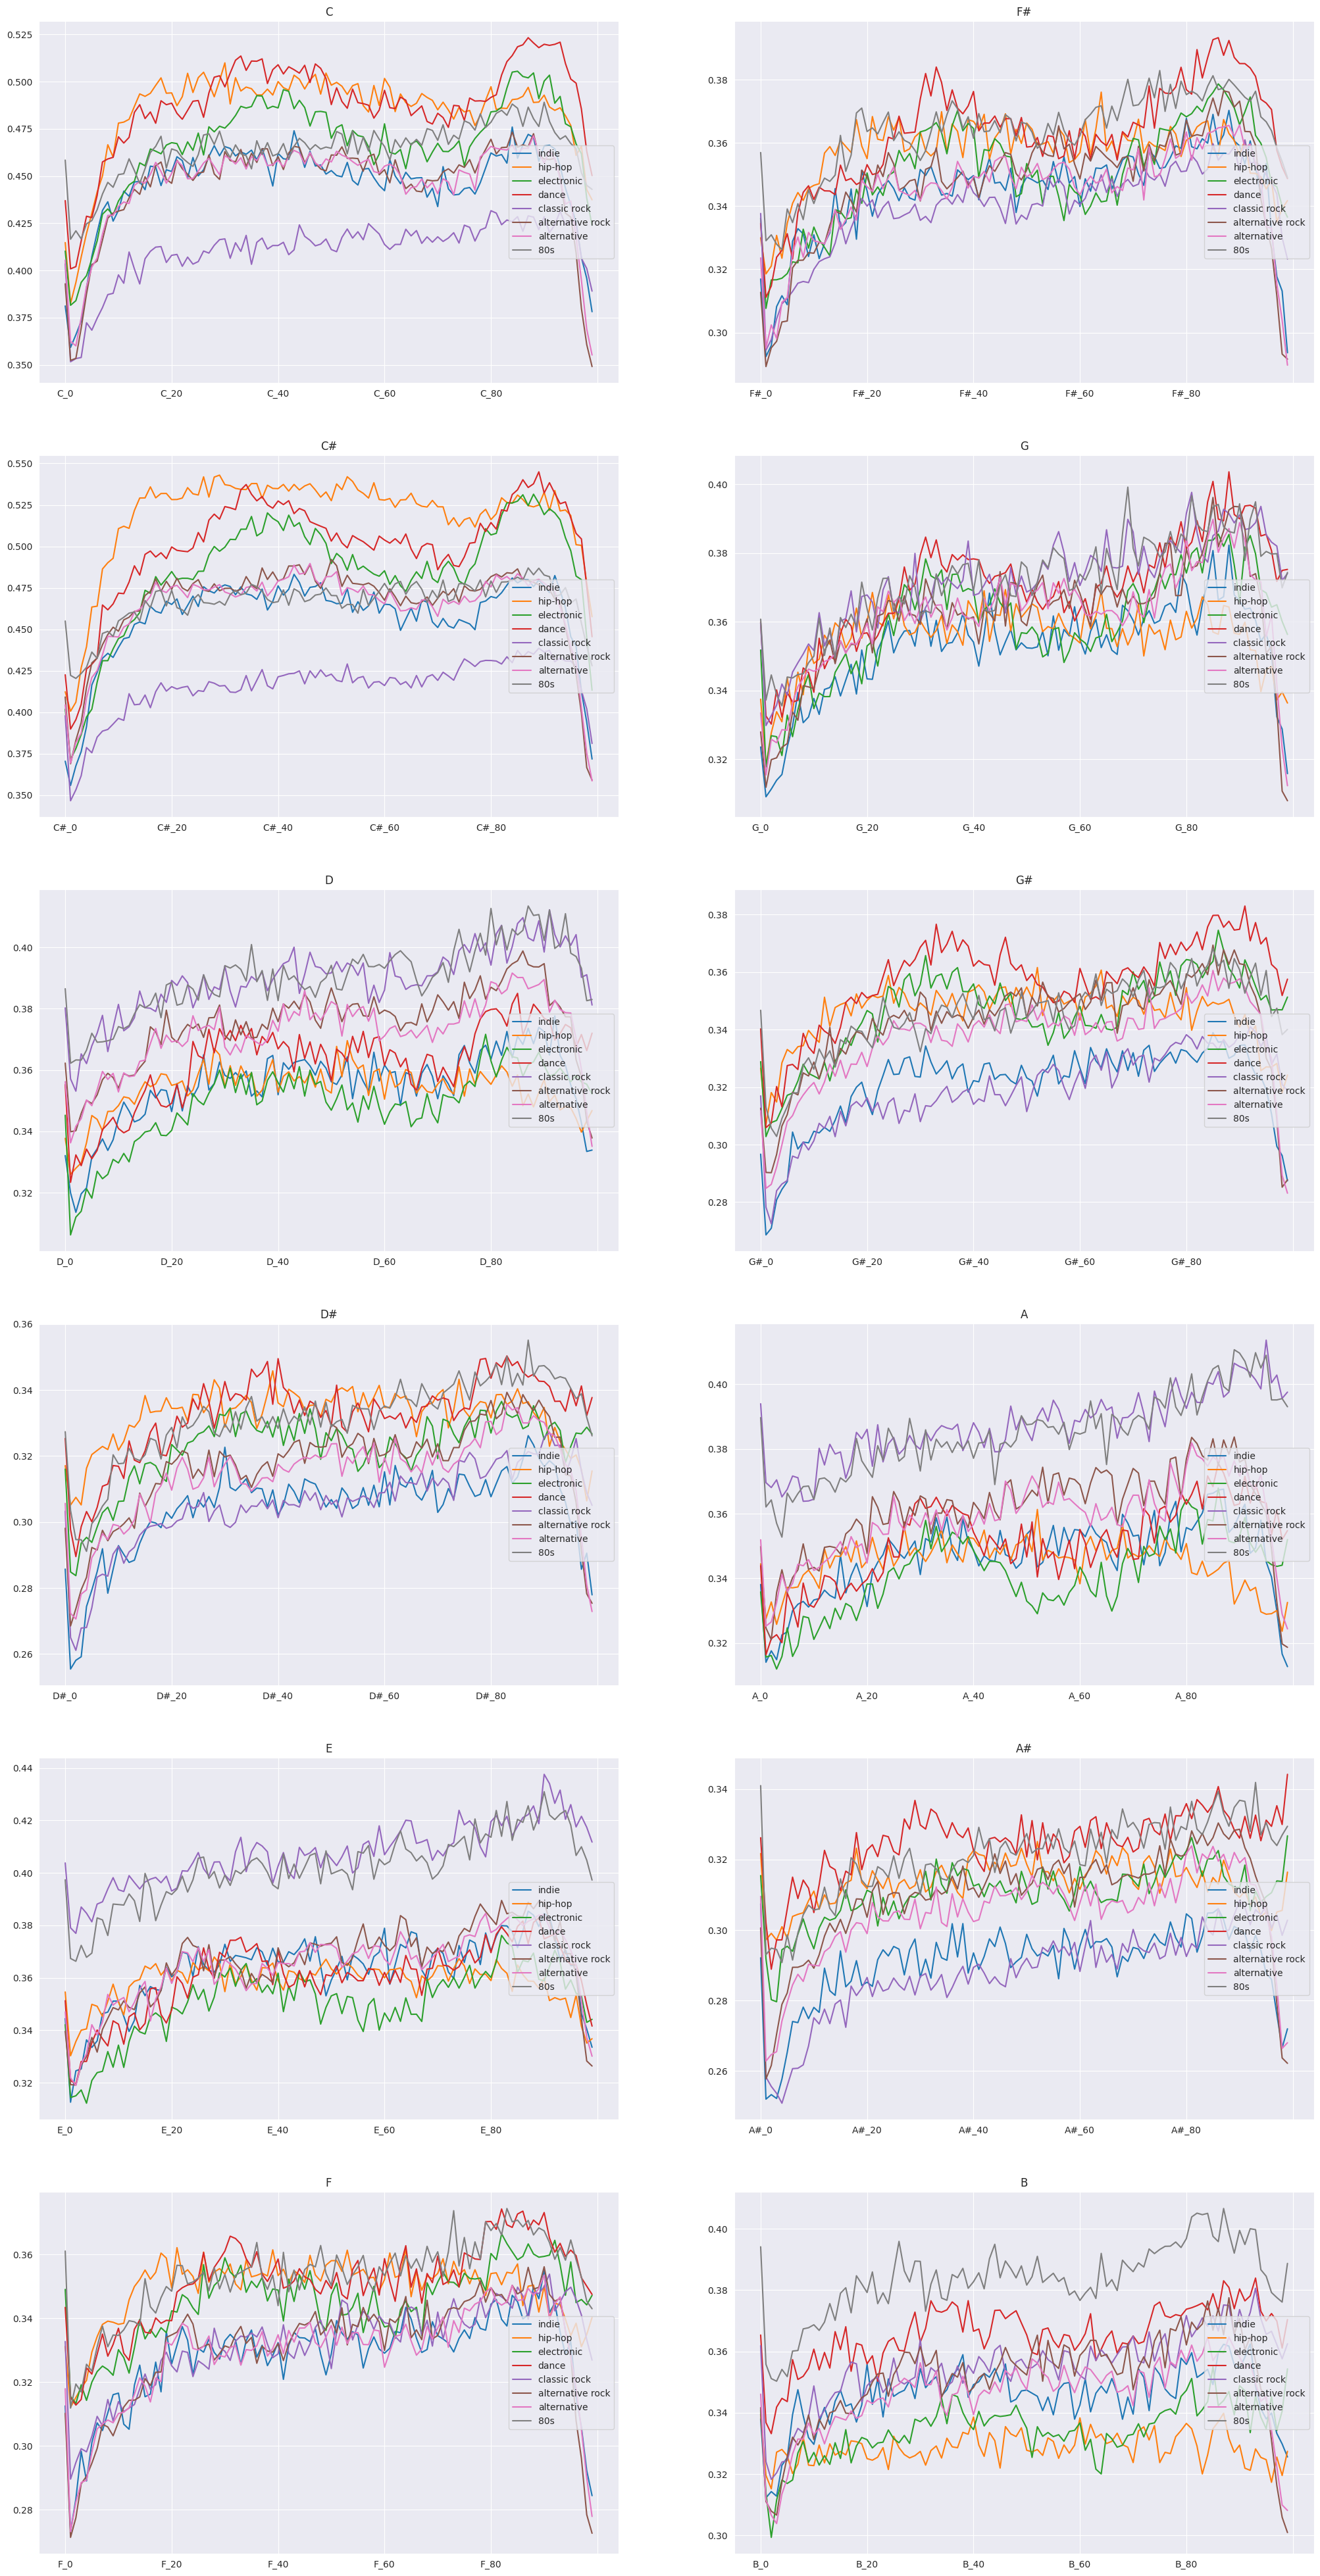

In [20]:
fig, ax = plt.subplots(len(pitch_symbol) // 2, 2, figsize=(25, 50))

for i, note in enumerate(pitch_symbol):
    cur_ax = ax[i % (len(pitch_symbol) // 2)][i // (len(pitch_symbol) // 2)]
    cur_ax.set_title(note)
    cur_ax.legend([*df_by_tags.keys()])
    for key, val in df_by_tags.items():
        curr_df = val[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
        curr_df.plot(ax=cur_ax, legend=False)

for i in ax:
    for axis in i:
        axis.legend([*df_by_tags.keys()], loc="center right")

## Spotify features

Here we decided to check if we could maybe differentiate our selected tags by plotting the boxplot of the spotify features for our selected tags.
But as we can see, most of them have a high spread and overlap, so we do not think that they are very helpful.

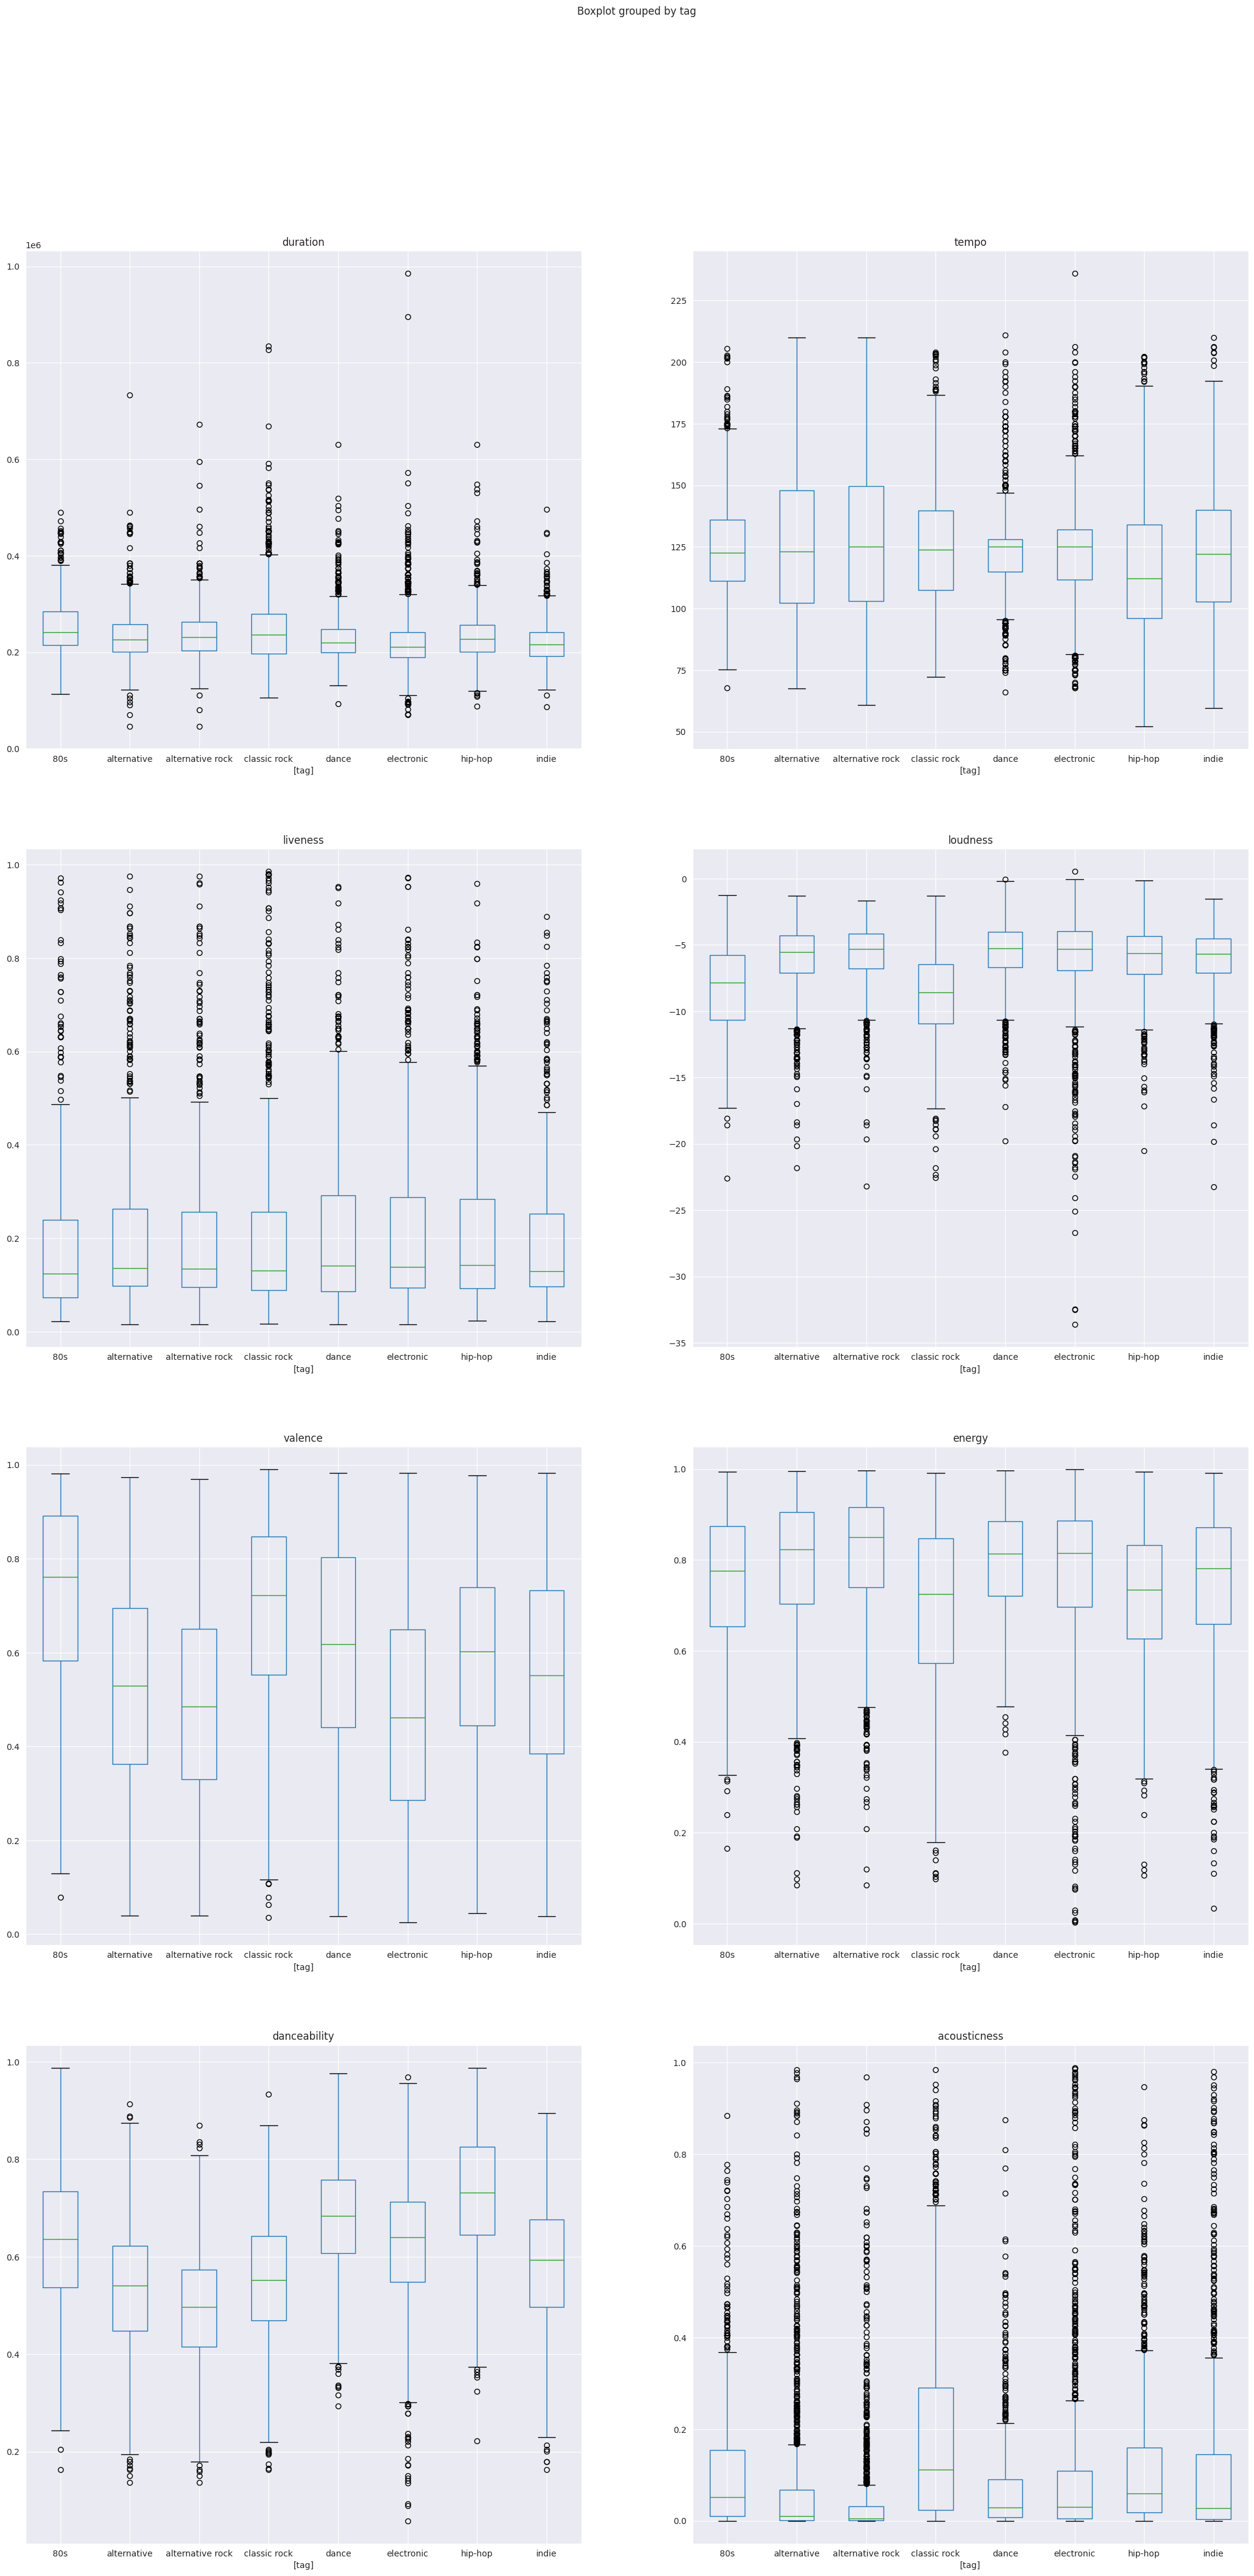

In [21]:
spotify_features = ['duration', 'liveness', 'valence', 'danceability', 'tempo', 'loudness', 'energy',
                    'acousticness']

fig, ax = plt.subplots(len(spotify_features) // 2, 2, figsize=(25, 50))

spotify_feature_df = pd.concat([
    # df_by_tags["misc"].assign(tag="misc"),
    # df_by_tags["pop"].assign(tag="pop"),
    df_by_tags["alternative"].assign(tag="alternative"),
    df_by_tags["alternative rock"].assign(tag="alternative rock"),
    df_by_tags["classic rock"].assign(tag="classic rock"),
    df_by_tags["electronic"].assign(tag="electronic"),
    df_by_tags["hip-hop"].assign(tag="hip-hop"),
    df_by_tags["indie"].assign(tag="indie"),
    df_by_tags["dance"].assign(tag="dance"),
    df_by_tags["80s"].assign(tag="80s")
])

for i, feature in enumerate(spotify_features):
    cur_ax = ax[i % (len(spotify_features) // 2)][i // (len(spotify_features) // 2)]
    cur_ax.set_title(feature)
    spotify_feature_df[["tag", feature]].boxplot(ax=cur_ax, by="tag")

## Songs per Tag

By counting the number of times a tag appears, we can see that we have an incredibly imbalanced dataset.
We think that this will mean that our classifier will try to tag most things with pop as it is by far the tag that appears the most often.
In the plot we already decided to filter out all tags that appear less than 250 times as they add no real information to the graph.

<class 'pandas.core.series.Series'>
Index: 10 entries, misc to 80s
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes

Top  genres
misc                11010
pop                  2051
alternative          1566
alternative rock     1266
classic rock         1170
electronic           1148
hip-hop               986
indie                 897
dance                 834
80s                   766
dtype: int64


Text(0.5, 1.0, 'Number of songs tagged with x')

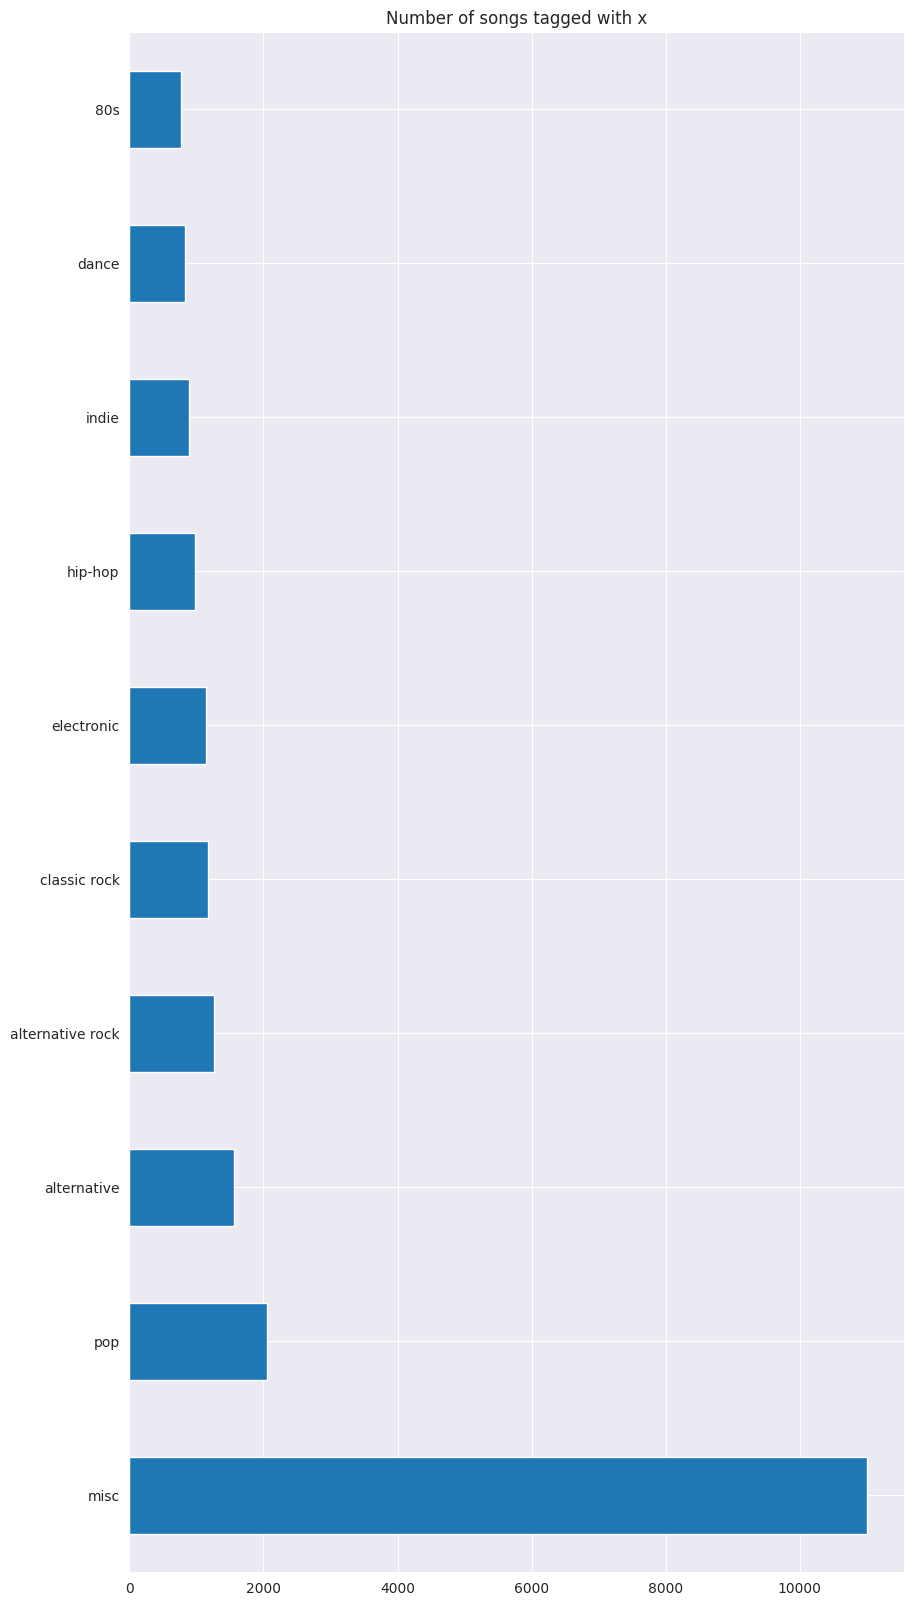

In [22]:
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df["tags"].values.tolist()))
counts = tags.value_counts()
counts.info()
print()
print("Top  genres")
print(counts)
counts.plot.barh(figsize=(10, 20))
plt.title("Number of songs tagged with x")

# Feature Preprocessing

Transform the labels via the `MultiLabelBinarizer` to a numerical representation, scale the input data and create a held-back test set.

In [23]:
# unique_lists_in_items = df["artist_genres"].unique().tolist()
# import numpy as np
#
# artist_genre_count = len(np.unique(flatmap(df["artist_genres"].values.tolist())))
# artist_genre_count

In [24]:
# from sklearn.feature_extraction import FeatureHasher
# feature_hasher = FeatureHasher(n_features=artist_genre_count, input_type="string")
# f = feature_hasher.transform(df["artist_genres"].values)
# artist_genres = f.toarray()
# df["artist_genres"] = artist_genres

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

# transform tags with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform([*df['tags']])

X = df.drop(columns=['tags', 'artist_names', 'artist_genres', 'name'])

# scale input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# create held-back test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=234634754)  # 70/30 split

Models like the `DecisionTree` might perform better, or even run at all, if they are provided with teh `class_weights` of the targets.

In [26]:
import numpy as np
from collections import Counter
from sklearn.utils import class_weight
flat_labels = [label for sublist in df['tags'] for label in sublist]
label_counts = Counter(flat_labels)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(flat_labels), y=flat_labels)
class_weights_dict = dict(zip(np.unique(flat_labels), class_weights))

# Create a list of class weight dictionaries for each label
class_weights_list = []
for i in range(y.shape[1]):
    label_column = y[:,i]
    label_counts = Counter(label_column)
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(label_column), y=label_column)
    class_weights_list.append(dict(zip(np.unique(label_column), class_weights)))
class_weights_list


[{0: 0.537051368869111, 1: 7.247389033942559},
 {0: 0.5821012897137464, 1: 3.5450191570881224},
 {0: 0.5643488868557487, 1: 4.3850710900473935},
 {0: 0.5588945937783147, 1: 4.744871794871795},
 {0: 0.5406076541045867, 1: 6.656474820143885},
 {0: 0.557659467604219, 1: 4.835801393728223},
 {0: 0.5487298606306217, 1: 5.630324543610548},
 {0: 0.5439447383891828, 1: 6.188963210702341},
 {0: 59.693548387096776, 1: 0.5042234332425068},
 {0: 0.6132898806893504, 1: 2.706728425158459}]

# Feature Selection

Some models can't effectively use 1241 features, so for them, we need to reduce the amount of features.

Other models like MLP however can use all features, so we do not throw away the other features

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## KNN Model

In [28]:
from sklearn.metrics import make_scorer, f1_score, precision_score, accuracy_score, hamming_loss, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

scorer = {
    'f1': make_scorer(f1_score, average="weighted"),
    'precision': make_scorer(precision_score, average="weighted", zero_division=0),
    "accuracy": make_scorer(accuracy_score),
    "hamming": make_scorer(hamming_loss),
    "jaccard": make_scorer(jaccard_score, average='weighted')
}

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=[{
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
        'leaf_size': [1, 3],
        'p': [1, 2, 4],
        'metric': ['manhattan', 'cosine', 'euclidean'],
    }],
    scoring=scorer,
    refit="accuracy",
    return_train_score=True,
    n_jobs=-1
)

# Fit the pipeline to the training data
knn.fit(X_train_pca, y_train)
knn.best_params_

/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/home/florian/projects/fh/mc/ml/venv/lib/python3.10/site-packages/sklearn/neighbors/_base.py", li

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'metric': 'euclidean',
 'p': 1,
 'weights': 'distance'}

In [29]:
# Use the trained model to predict the tags for the new songs
predicted_tags = knn.predict(X_test_pca)
predicted_tags_inversed = mlb.inverse_transform(predicted_tags)

In [134]:
predicted_tags_inversed

[('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc', 'pop'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('80s', 'misc'),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('80s', 'misc'),
 ('misc',),
 ('misc',),
 ('misc', 'pop'),
 ('misc', 'pop'),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc', 'pop'),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('classic rock', 'misc'),
 ('misc',),
 ('misc',),
 ('80s', 'classic rock', 'misc', 'pop'),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('misc',),
 ('hip-hop', 'misc'),
 ('misc',),


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix

def confusion_matrix(y_true, y_actual):
    mats = multilabel_confusion_matrix(y_true=y_true, y_pred=y_actual)
    fig, axs = plt.subplots(nrows=len(mats)//2, ncols=2, figsize=(10, 15))
    fig.tight_layout(pad=3)
    plot_labels = mlb.inverse_transform(np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))[0]
    for idx, mat in enumerate(mats):
        axs[idx//2,idx % 2].set_title(plot_labels[idx])
        axs[idx//2,idx % 2].xaxis.tick_top()
        mat_df = pd.DataFrame(mat, index=[i for i in ["Positive", "Negative"]], columns=[i for i in ["Positive", "Negative"]])
        sns.heatmap(mat_df, annot=True, ax=axs[idx//2,idx % 2])
    plt.show()

def print_performance_report(y_pred):
    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}".format(acc))

    # Calculate the precision
    pre = precision_score(y_test, y_pred, average="samples", zero_division=False)
    print("Precision: {:.2f}".format(pre))

    # Calculate the recall
    rec = recall_score(y_test, y_pred, average="samples")
    print("Recall: {:.2f}".format(rec))

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average="samples")
    print("F1-score: {:.2f}".format(f1))
    confusion_matrix(y_test, y_pred)

KNN
Accuracy: 0.34
Precision: 0.91
Recall: 0.66
F1-score: 0.72


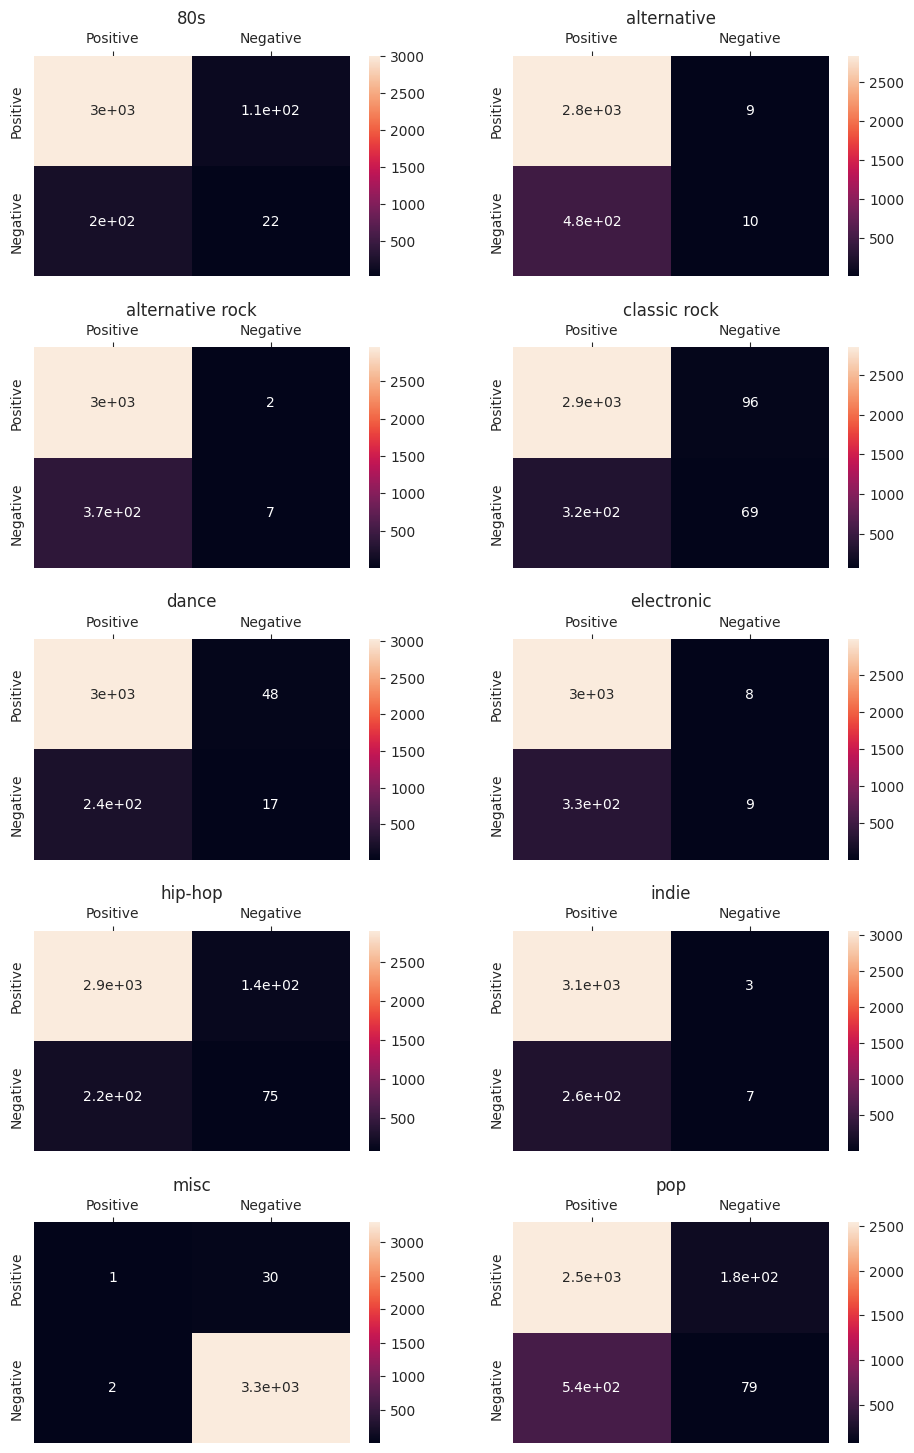

In [33]:
y_pred_knn = predicted_tags
print("KNN")
print_performance_report(y_pred_knn)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=[{
        'criterion': ['gini'],
        'splitter': ['best', 'random'],
        'max_depth': [1, 2, 8, 16, 48],
        'min_samples_leaf': [1, 10, 30],
        'min_weight_fraction_leaf': [0.0, 0.0001, 0.0001**10],
        'max_features': [None, 'sqrt', 'log2'],
        'max_leaf_nodes': [None, 10, 100, 1000],
        'min_impurity_decrease': [0.0, 0.0001, 0.0001**10],
        'class_weight': [class_weights_list], #TODO(multilabel dict)
        'ccp_alpha': [0.0, 0.0001, 0.0001**10]
    }],
    n_jobs=-1
)
tree.fit(X_train, y_train)
tree.best_params_

In [ ]:
# Use the trained model to predict the tags for the new songs
predicted_tags = tree.predict(X_test_pca)
predicted_tags_inversed = mlb.inverse_transform(predicted_tags)

In [ ]:
predicted_tags_inversed

In [ ]:
y_pred_dec_tree = predicted_tags
print("Decision Tree")
print_performance_report(y_pred_dec_tree)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 300, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [12, 24, 36, 48, 64],
    'min_samples_split': [2, 8, 32],
    #    'min_samples_leaf': [1, 2, 4, 12],
    #    'max_leaf_nodes': [None, 2, 8, 256, 512],
    'max_features': ['sqrt', 'log2', None],
    'n_jobs': [-2],
    'class_weight': [class_weights_list, None]
}
etc = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid)

# https://scikit-learn.org/stable/modules/multiclass.html#
etc.fit(X_train_pca, y_train)

In [ ]:
# Use the trained model to predict the tags for the new songs
predicted_tags = etc.predict(X_test_pca)

In [ ]:
etc.best_params_

In [ ]:
mlb.inverse_transform(predicted_tags)

In [ ]:
y_pred_extra_trees = predicted_tags
print("ExtraTrees")
print_performance_report(y_pred_extra_trees)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc.fit(X_train, y_train)
rfc.best_params_

In [ ]:
y_pred_random_forest = rfc.predict(X_test)
print("RandomForest")
print_performance_report(y_pred_random_forest)

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(150,150,150), (100,100,100), (150,200,150)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate_init': [0.01, 0.001, 0.0001],
}
mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5)
mlp.fit(X_train, y_train)
mlp.best_params_

In [ ]:
y_pred_mlp = mlp.predict(X_test)
print("RandomForest")
print_performance_report(y_pred_mlp)